# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Patrick | Okafor | Patrick Okafor | 7| 30% |
| Member 2: |  Ifeanyi | Afoama | Ifeanyi Afoama | 5 | 23.33% |
| Member 3: | Moses | Kimiji | Moses Kimiji | 5| 23.33% |
| Member 4: | Okoye | Akachukwu | Okoye Akachukwu | 5 | 23.33%|


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

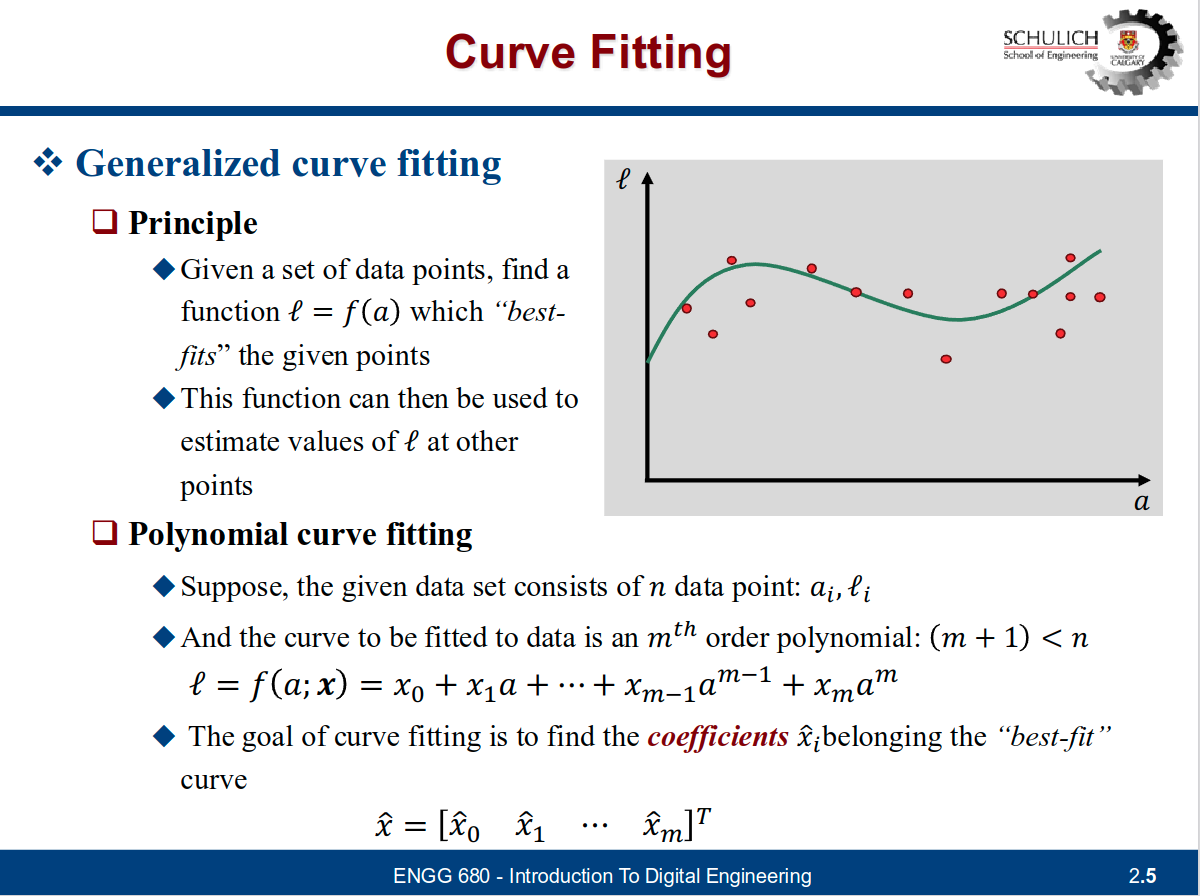

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [62]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)

df_data = pd.read_excel('data.xlsx')
arr_data = np.array(df_data)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = np.array(df_data["l"])
l_var = np.array(df_data["l_var"])
l_true = np.array(df_data["l_true"])

In [64]:
# step 3
# define the number of observation n
# (1 mark)
n = len(df_data)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)

# Create an identity matrix
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
# Generate an array of n evenly spaced values between start and end
a = np.linspace(start, end, n)

print(P)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


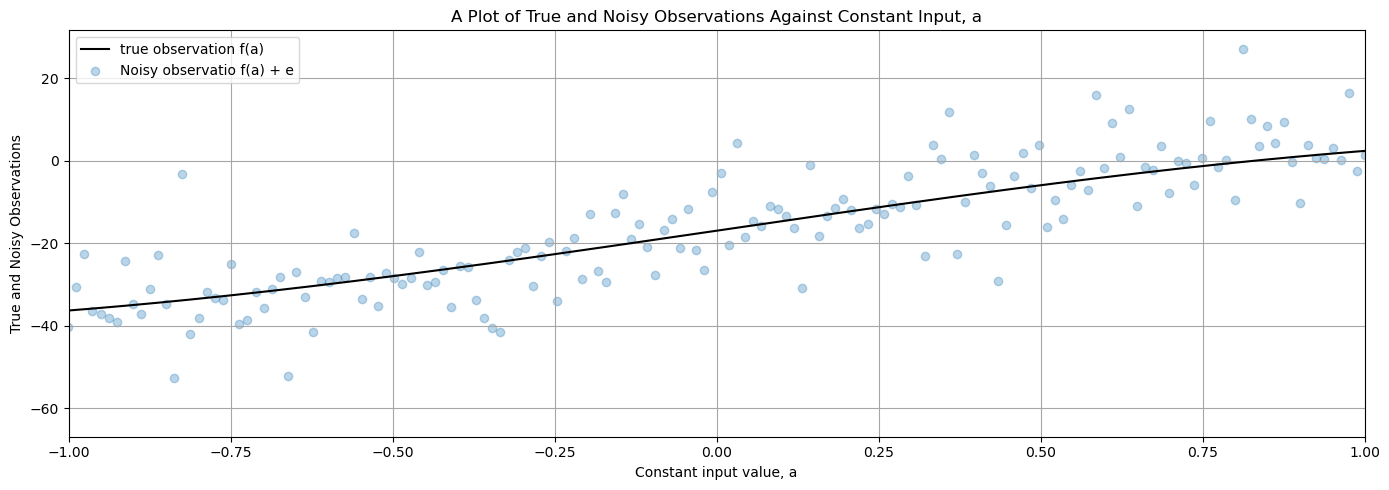

In [65]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a,l_true, label="true observation f(a)", color='k')

# Plot noisy observation
ax.scatter(a, l, label="Noisy observatio f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Add labels and title
ax.set_xlabel('Constant input value, a')
ax.set_ylabel('True and Noisy Observations')
ax.set_title('A Plot of True and Noisy Observations Against Constant Input, a')

# Add legend
ax.legend()

# Set x-axis limits
ax.set_xlim([-1, 1])

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

# Show the plot
plt.show()

In [66]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Initialize the design matrix A to be an array of zeros
    A = np.zeros((len(a), deg + 1))  

    # For each row in the design matrix above, replace the value of each column with
    # Computed values of "a"
    for i in range(len(a)):
            for j in range(deg + 1):
                A[i, j] = a[i] ** j

    print(f"Design matrix:\n {A}")

    # Get a transpose of the design matrix A
    A_T = A.T

    # Recall that the normal equation of a weighted LSE is given thus: X = (A^T.A)^-1.A^T.l

    # Calculate the transpose of Design matrix A_T multiplied by design matrix A and weight matrix P
    A_TPA = A_T @ P @ A

    # Transpose of design matrix A multiplied by observation matrix l
    A_TPl =  A.T @ P @ l

    # Calculate the inverse of A_TA matrix
    A_TPA_inv = np.linalg.inv(A_TPA)

    # Calculate normal equation
    X_hat = A_TPA_inv @ A_TPl

    # Calculate the estimated observations, l_hat
    l_hat = A @ X_hat

    # Calculate the residuals, v
    v = l - l_hat

    # Calculate the transpose of residual v_T multiplied by v
    v_Tv = v.T @ v

    # Calculate variance of the observation sigma_l
    apv =  ( 1 / (n - (deg))) * v_Tv

    # Calculate covariance matrix of the estimated coefficients
    cov_x = apv * A_TPA_inv


    return (X_hat, cov_x, apv, v)

In [67]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Call fit_polynomial_curve function using polynomial degree of 1 and unpack the returned values
X_hat, cov_x, apv_deg_1, v = fit_polynomial_curve(a,l,P,1)
print(f"Deg 1 apv: {apv_deg_1}")
print("Degree 1")
print(X_hat)

# Call fit_polynomial_curve function using polynomial degree of 3 and unpack the returned values
x, cov_x, apv_deg_3, v = fit_polynomial_curve(a,l,P,3)
print(f"Deg 3 apv: {apv_deg_3}")
print("Degree 3")
print(x)

# Call fit_polynomial_curve function using polynomial degree of 5 and unpack the returned values
X_hat, cov_x, apv_deg_5, v = fit_polynomial_curve(a,l,P,5)
print(f"Deg 5 apv: {apv_deg_5}")
print(X_hat)


Design matrix:
 [[ 1.         -3.14159265]
 [ 1.         -3.1290011 ]
 [ 1.         -3.11640955]
 [ 1.         -3.10381799]
 [ 1.         -3.09122644]
 [ 1.         -3.07863488]
 [ 1.         -3.06604333]
 [ 1.         -3.05345178]
 [ 1.         -3.04086022]
 [ 1.         -3.02826867]
 [ 1.         -3.01567712]
 [ 1.         -3.00308556]
 [ 1.         -2.99049401]
 [ 1.         -2.97790246]
 [ 1.         -2.9653109 ]
 [ 1.         -2.95271935]
 [ 1.         -2.94012779]
 [ 1.         -2.92753624]
 [ 1.         -2.91494469]
 [ 1.         -2.90235313]
 [ 1.         -2.88976158]
 [ 1.         -2.87717003]
 [ 1.         -2.86457847]
 [ 1.         -2.85198692]
 [ 1.         -2.83939536]
 [ 1.         -2.82680381]
 [ 1.         -2.81421226]
 [ 1.         -2.8016207 ]
 [ 1.         -2.78902915]
 [ 1.         -2.7764376 ]
 [ 1.         -2.76384604]
 [ 1.         -2.75125449]
 [ 1.         -2.73866293]
 [ 1.         -2.72607138]
 [ 1.         -2.71347983]
 [ 1.         -2.70088827]
 [ 1.       

In [68]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Given coefficients
coefficients = np.array(X_hat)  # Flatten to 1D array

# linear_coeffs = [coefficients[1], coefficients[0]]
linear_coeffs = [coefficients[1],coefficients[0]]

# Cubic coefficients: f(x)
cubic_coeffs = [coefficients[3], coefficients[2],coefficients[1],coefficients[0] ]

# Quintic coefficients:
quintic_coeffs = [coefficients[4], coefficients[3],coefficients[2],coefficients[1],coefficients[0]]

# Evaluating polynomials
line_uw = np.polyval(linear_coeffs, a)  # Linear polynomial evaluation
cubic_uw = np.polyval(cubic_coeffs, a)  # Cubic polynomial evaluation
quintic_uw = np.polyval(quintic_coeffs, a)  # Quintic polynomial evaluation

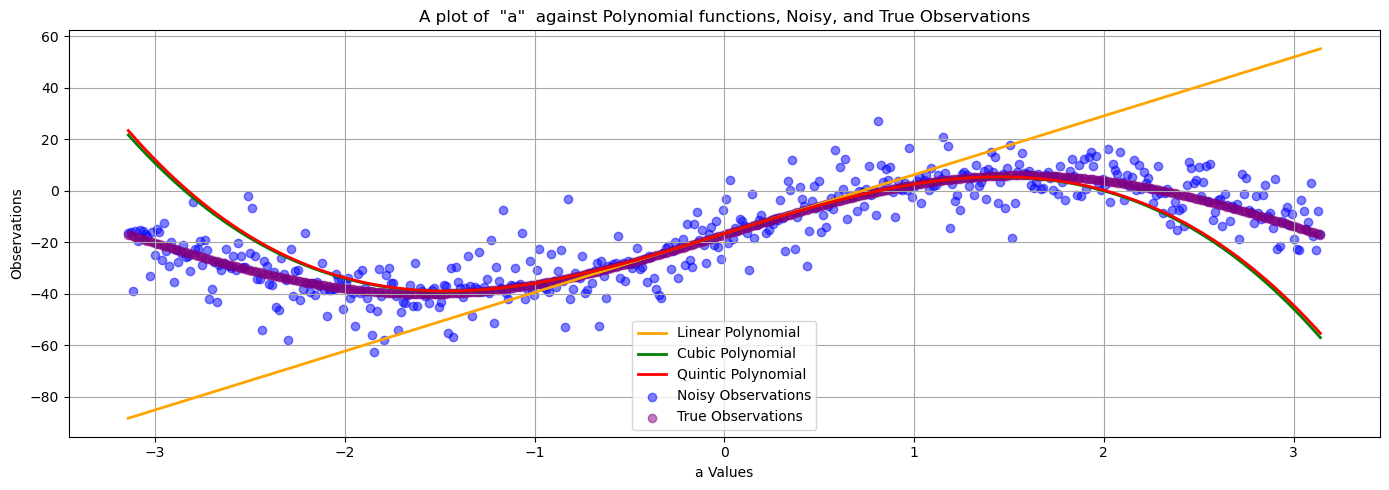

In [69]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plot polynomial functions
ax.plot(a, line_uw, color='orange', label='Linear Polynomial', linewidth=2)
ax.plot(a, cubic_uw, color='green', label='Cubic Polynomial', linewidth=2)
ax.plot(a, quintic_uw, color='red', label='Quintic Polynomial', linewidth=2)

# Plot noisy and true observations
ax.scatter(a, l, color='blue', label='Noisy Observations', alpha=0.5)
ax.scatter(a, l_true, color='purple', label='True Observations', alpha=0.5)

# Customize the plot
ax.grid(True, which='both', ls='-', color='0.65')
ax.set_xlabel('a Values')
ax.set_ylabel('Observations')
ax.set_title('A plot of  "a"  against Polynomial functions, Noisy, and True Observations')
ax.legend()

# Adjust layout
fig.tight_layout()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

# Show the plot
plt.show()

In [70]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# Posterier variance factor for degree 1 polynomial
print(f"Degree 1 posterier variance: {apv_deg_1}")

# Posterier variance factor for degree 3 polynomial
print(f"Degree 3 posterier variance: {apv_deg_3}")

# Posterier variance factor for degree 5 polynomial
print(f"Degree 5 posterier variance: {apv_deg_5}")


Degree 1 posterier variance: 162.416471112129
Degree 3 posterier variance: 65.99921489805664
Degree 5 posterier variance: 63.62953989355755


In [71]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the norms
print(f"Norm between line polynomial and true observations: {norm_line}")
print(f"Norm between cubic polynomial and true observations: {norm_cubic}")
print(f"Norm between quintic polynomial and true observations: {norm_quintic}")

Norm between line polynomial and true observations: 684.357307477205
Norm between cubic polynomial and true observations: 269.698283053349
Norm between quintic polynomial and true observations: 269.77986414011417


In [72]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# Comment on Posterier Variance Factor:
  # From the given outputs of the posterier variance factor values above,
  #  it was observed that the variance factor decreases with an increase
  #  in the number of degrees of the polynomial. As the model complexity
  # increases ( moving from degree 1 to degree 3), the posterior variance
  # tends to decrease. This indicates that the model becomes more confident
  # in its predictions because it can better fit the data and capture more
  #  of the underlying structure. While increasing complexity initially
  # leads to a noticeable reduction in variance, beyond a certain point
  # (from degree 3 to degree 5), the reduction in posterior variance
  # becomes marginal. This means that adding more complexity to the model
  # doesn't lead to proportionally large gains in certainty. With this algorithm,
  # we can test different degrees of polynomials to see  the one that best fits
  # the model to the data point.

# Commnent on the Norm Values of the Polynomial Functions and True Observations:

  # The norm for the degree 1 (linear) model is quite large, indicating
  # that the predictions from the linear model deviates significantly from
  # the true observations. This suggests that a simple linear model does
  # not capture the complexity of the underlying data structure properly,
  # and this led to poor predictive performance. When we increased the degree
  # of the polynomial from 1 to 3, the norm value decreased significantly,
  # this indicates that cubic model fits well with the true data structure
  # more than the linear model. We witnessed a further small decrease in
  # the Norm value as the polynomial degree increased from 3 to 5. The
  # small decrease in the norm for polynomial of 5 shows that further
  # increase in the model complexity will yield marginal result, and if we
  # continue increasing the complexity, the model is more likely to overfit
  # the data structure which is exctly what we don't want.


In [73]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

#Define diagonal matrix p using variance of observation data l_var
P = np.diag(l_var)
print(P)

[[ 36   0   0 ...   0   0   0]
 [  0 144   0 ...   0   0   0]
 [  0   0 169 ...   0   0   0]
 ...
 [  0   0   0 ...  25   0   0]
 [  0   0   0 ...   0  64   0]
 [  0   0   0 ...   0   0   4]]


Design matrix:
 [[ 1.         -3.14159265]
 [ 1.         -3.1290011 ]
 [ 1.         -3.11640955]
 [ 1.         -3.10381799]
 [ 1.         -3.09122644]
 [ 1.         -3.07863488]
 [ 1.         -3.06604333]
 [ 1.         -3.05345178]
 [ 1.         -3.04086022]
 [ 1.         -3.02826867]
 [ 1.         -3.01567712]
 [ 1.         -3.00308556]
 [ 1.         -2.99049401]
 [ 1.         -2.97790246]
 [ 1.         -2.9653109 ]
 [ 1.         -2.95271935]
 [ 1.         -2.94012779]
 [ 1.         -2.92753624]
 [ 1.         -2.91494469]
 [ 1.         -2.90235313]
 [ 1.         -2.88976158]
 [ 1.         -2.87717003]
 [ 1.         -2.86457847]
 [ 1.         -2.85198692]
 [ 1.         -2.83939536]
 [ 1.         -2.82680381]
 [ 1.         -2.81421226]
 [ 1.         -2.8016207 ]
 [ 1.         -2.78902915]
 [ 1.         -2.7764376 ]
 [ 1.         -2.76384604]
 [ 1.         -2.75125449]
 [ 1.         -2.73866293]
 [ 1.         -2.72607138]
 [ 1.         -2.71347983]
 [ 1.         -2.70088827]
 [ 1.       

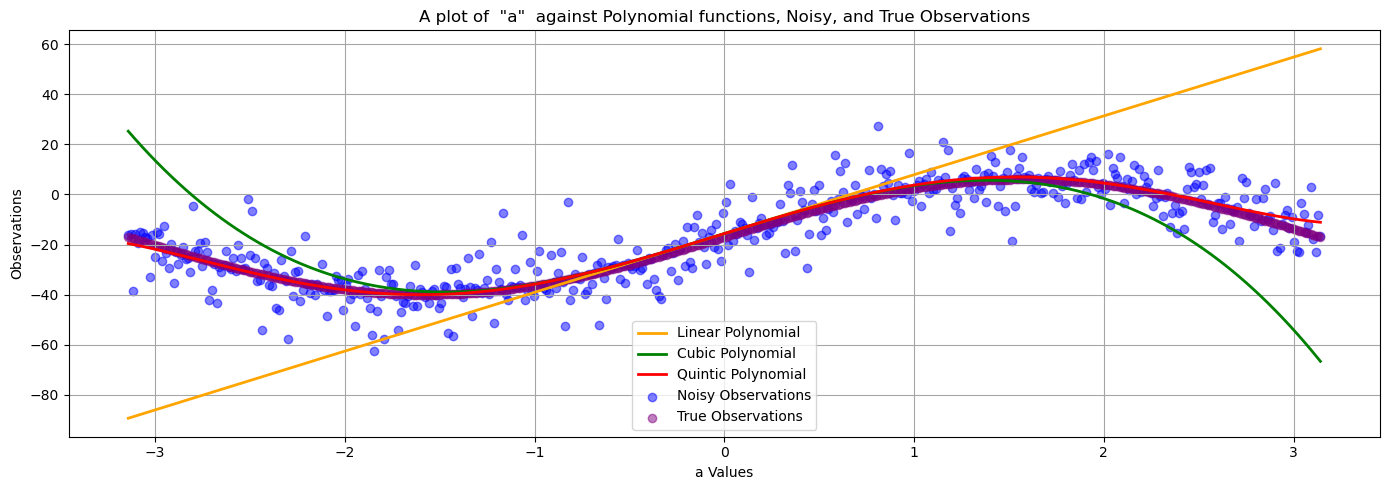

Deg 1 posterier variance: 162.43346331864436
Deg 3 posterier variance: 66.2590643198648
Deg 5 posterier variance: 64.13564605755138
Norm between line polynomial and true observations: 709.6557966389774
Norm between cubic polynomial and true observations: 321.34124812164777
Norm between quintic polynomial and true observations: 30.655055741588825


In [74]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ------------------- REPETITION OF STEP 6 USING WEIGHTED P MATRIX -------------------
# Call fit_polynomial_curve function using polynomial degree of 1 and unpack the returned values
X_hat, cov_x, apv_deg_1, v = fit_polynomial_curve(a,l,P,1)
print(f"Deg 1 apv: {apv_deg_1}")

# Call fit_polynomial_curve function using polynomial degree of 3 and unpack the returned values
x, cov_x, apv_deg_3, v = fit_polynomial_curve(a,l,P,3)
print(f"Deg 3 apv: {apv_deg_3}")

# Call fit_polynomial_curve function using polynomial degree of 5 and unpack the returned values
X_hat, cov_x, apv_deg_5, v = fit_polynomial_curve(a,l,P,5)
print(f"Deg 5 apv: {apv_deg_5}")

#------------------- REPETITION OF STEP 7 USING WEIGHTED P MATRIX ---------------------------

# Given coefficients
coefficients = np.array(X_hat).flatten()  # Flatten to 1D array

# Defining the coefficients for each polynomial degree

# Linear coefficients: f(x) = b*x + a
linear_coeffs = [coefficients[1], coefficients[0]]


# Cubic coefficients:
cubic_coeffs = [coefficients[3], coefficients[2], coefficients[1], coefficients[0]]

# Quintic coefficients:
quintic_coeffs = [coefficients[5], coefficients[4], coefficients[3], coefficients[2], coefficients[1], coefficients[0]]

# Evaluating polynomials
line_uw = np.polyval(linear_coeffs, a)  # Linear polynomial evaluation
cubic_uw = np.polyval(cubic_coeffs, a)  # Cubic polynomial evaluation
quintic_uw = np.polyval(quintic_coeffs, a)  # Quintic polynomial evaluation


#-------------------  REPETITION OF STEP 8 USING WEIGHTED P MATRIX ----------------------

# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# ...

# Plot polynomial functions
ax.plot(a, line_uw, color='orange', label='Linear Polynomial', linewidth=2)
ax.plot(a, cubic_uw, color='green', label='Cubic Polynomial', linewidth=2)
ax.plot(a, quintic_uw, color='red', label='Quintic Polynomial', linewidth=2)

# Plot noisy and true observations
ax.scatter(a, l, color='blue', label='Noisy Observations', alpha=0.5)
ax.scatter(a, l_true, color='purple', label='True Observations', alpha=0.5)

# Customize the plot
ax.grid(True, which='both', ls='-', color='0.65')
ax.set_xlabel('a Values')
ax.set_ylabel('Observations')
ax.set_title('A plot of  "a"  against Polynomial functions, Noisy, and True Observations')
ax.legend()

# Set x-axis limits
# ax.set_xlim([-1, 1])

# Adjust layout
fig.tight_layout()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

# Show the plot
plt.show()

#-------------------  REPETITION OF STEP 9 USING WEIGHTED P MATRIX ----------------------

# print the a posterier variance factor for each polynomial function

# Posterier variance factor for degree 1 polynomial
print(f"Deg 1 posterier variance: {apv_deg_1}")

# Posterier variance factor for degree 3 polynomial
print(f"Deg 3 posterier variance: {apv_deg_3}")

# Posterier variance factor for degree 5 polynomial
print(f"Deg 5 posterier variance: {apv_deg_5}")

#-------------------  REPETITION OF STEP 10 USING WEIGHTED P MATRIX ----------------------

# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations

norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the norms
print(f"Norm between line polynomial and true observations: {norm_line}")
print(f"Norm between cubic polynomial and true observations: {norm_cubic}")
print(f"Norm between quintic polynomial and true observations: {norm_quintic}")


In [75]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# Comparison between Weighted and Unweight LSE Posterier Variance Factor
  # The posterier variance factor value for the weighted LSE is slightly higher than that
  # of the unweighted LSE, but both still follows the same pattern of getting a better model fit
  # (smaller values of variance) with increase in the model complexity (degree), this is was the observed phenomena. 
  # This shows that the data structure requires a more complex model to fit a line that will capture much of the data points as it can
  # be seen from the associated plots. The difference between weighted and unweighted LSE are not that much, this shows that the weight 
  # had no significant effect in the computation.

# Comparison between Weighted and Unweight LSE Norm Values:
  # The norm in the weighted LSE is higher than that of the unweighted LSE for the linear and cubic
  # polynomials. This shows that the weighted LSE results in larger deviations from the true observations at lower 
  # polynomial degrees. However, when the polynomial degree was increased to 5 in the weighted LSE,
  # the norm value decreased significantly compared to the norm of polynomial of degree 5 in the unweighted LSE. This
  # indicates that applying weights in this instance helps to significantly improve the model fit.
  # In summary, The choice of weights can sometimes lead to a better fit, but it must be carefully chosen, as seen from 
  # the quintic polynomial's significant improvement in the weighted case.



# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

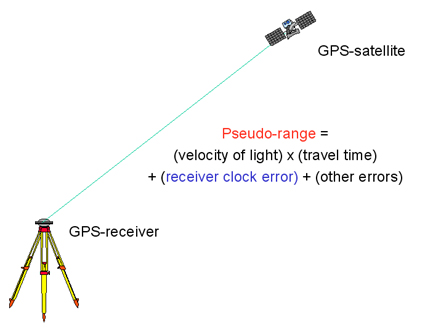

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [76]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

# Import pseudorange and satellite position data files using pandas library
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel("satellite_position.xlsx").drop("Satellite_ID", axis=1)

# Convert DataFrames to NumPy arrays
pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()



In [77]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

# Define number of measurements (rows of pseudorange array)
n = pseudorange.shape[0]

# Define number of states (typically 4 in a GPS system: X, Y, Z, and clock bias)
m = 4

print(f"Number of observations, n: {n}")
print(f"Number of states, m: {m}")

Number of observations, n: 11
Number of states, m: 4


In [78]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# Identity matrix of size n, where n is the number of measurements
P = np.eye(n)
print(P)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [79]:
# step 4
# set the initial states as zeros:
# (1 mark)

# Create an array of zeros
x_0 = np.zeros(m)
print(x_0)

[0. 0. 0. 0.]


In [80]:
# step 5
# GroundTruth coordiantes of the receive
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])
GroundTruth = np.reshape(GroundTruth,(1, 3))


In [81]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)

# Create a 1 x m array and initialize its values to ones
delta = np.ones(m)  

# Initialize the iteration loop counter to zero
i = 0

# Initialize related arrays as empty lists
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()
residuals = []

print("delta:", delta)
print("i:", i)
print("x_hat:",x_hat)

delta: [1. 1. 1. 1.]
i: 0
x_hat: [0. 0. 0. 0.]


In [82]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

# Create a function that handles euclidean distance calculation
def euclidean_norm(receiver_pos, satellite_pos):

  # Compute the difference between the receiver position and each satellite position
    diff = satellite_pos - receiver_pos  

    # Calculate the Euclidean distance for each satellite
    distance = np.linalg.norm(diff, axis=1)  # Compute row-wise Euclidean distance
    print(distance)

    return distance


In [83]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)

# Define a function that handles design matrix creation
def create_design_matrix(r_pos, s_pos, rho):

# Number of satellites
    n = s_pos.shape[0]

    # Create an n x 4 design matrix and initialize it with zeros
    A = np.zeros((n, 4))

    # Run a loop for then number of observation n, for iteration compute the difference
    # between the receiver and satellite position coordinates (X,Y,Z)
    for i in range(n):
        # Compute the difference between the satellite position and the receiver position
        diff = r_pos - s_pos[i, :3] 

        # Divied this difference by the geometric distance and unpack each coordinate   
        x,y,z  = diff / rho[i]

        # Create an array with the x,y,z values and -1, then add it to the current row of the design matrix
        A[i] = [x,y,z, -1]
        
    # Print computed A
    print(f"Design matrix, A:\n {A}")
    return A

In [84]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

threshold = 0.001

# Check for convergence using only X,Y,and Z of the correction matrix, delta
while np.linalg.norm(delta[:3]) >= threshold:

   # compute the geometric distance between Satellites and receiver, using the euclidean_norm function we just defined
   # (1 marks)
   rho = euclidean_norm(x_hat[:3], sat_pos)
   print(f"Rho:\n {rho}\n")

    # compute the design matrix A
    # (1 marks)
   A = create_design_matrix(x_hat[:3], sat_pos, rho)

 # compute the misclosure array w
 # (1 marks)
   w = pseudorange[:, 1] - (rho)
   print(f"Misclosure, w : {w}\n")

 # compute the corrections delta
 # (1 marks)
   delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

 # update the estimated states
 # (1 marks)
   x_hat = x_0 + delta

  # Calculater residuals
   residuals = w - A @ delta

 # Update initial state values with the recent estimated parameters
   x_0 = x_hat


 # compute the position error from using the updated states against groundtruth
 # (1 marks)

 # Get the difference between ground truth value and estimated value, then calculate the
 # length of the vector
   err_pos = np.linalg.norm(GroundTruth - x_hat[:3])


 # update the counter i, (i.e., increment of 1 for each iteration)
 # (1 mark)
   i += 1

 # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
 # (1 marks)
   arr_w.append(w)
   arr_delta.append(delta)
   arr_err_pos.append(err_pos)
   arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)

# Compute aposteriori Variance
apv = (w.T @ P @ w) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)


# Turn arr_err_pos into numpy array and reshape it to n x 1 matrix
arr_err_pos = np.array(arr_err_pos)
arr_err_pos = np.reshape(arr_err_pos,(len(arr_err_pos),1))

# Turn residual list to a numpy array
residuals = np.array(residuals)
print(f"residuals:\n {residuals}\n")

# apv2 = (1/ n - m) * residuals.T @ P @ residuals
# print(f"apv2: {apv2}\n")




Diff array: 
[[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035.5286677   -7259803.67892242  16472981.9071979 ]
 [-15931152.0364578   12077367.2515846   18058076.7648504 ]
 [ -7680014.10843999 -13855462.7231353   21842975.3728112 ]]
[26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 26616740.72663527 26595227.45399327
 26353600.49429986 26939906.11311798 26982810.03000365]
Rho:
 [26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 26616740

In [85]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

print("------------ LSE Results ----------\n")
print(f"Estimated receiver coordinates:\n {x_hat}\n")
print(f"Matrix of correction, delta:\n {delta}\n")
print(f"Misclosure matrix:\n {w}\n")
print(f"A Posteriori Variance, apv:\n {apv}\n")
print(f"Covariance Matrix of Estimated States:\n{C_x_hat}\n")
print(f"Number of Iterations:\n {i}\n")
print(f"3-D Position Errors array:\n {arr_err_pos} meters\n")



------------ LSE Results ----------

Estimated receiver coordinates:
 [-1633492.44451686 -3651629.54237943  4952485.43270835 -1266156.46031265]

Matrix of correction, delta:
 [ 3.23307953e-06  6.39553885e-06 -1.76006388e-05 -6.47201389e+00]

Misclosure matrix:
 [6.73199449 6.58320138 5.37251963 6.46702535 6.67233761 5.05386584
 6.38075615 7.98411365 6.73568201 7.08340714 6.12735873]

A Posteriori Variance, apv:
 66.70786244817819

Covariance Matrix of Estimated States:
[[ 21.32317255   4.6470333   -5.64161838   4.87426444]
 [  4.6470333   28.38210981 -38.76203651  24.56574424]
 [ -5.64161838 -38.76203651 136.45770919 -73.6468593 ]
 [  4.87426444  24.56574424 -73.6468593   46.64596431]]

Number of Iterations:
 5

3-D Position Errors array:
 [[1.16550698e+06]
 [3.29426686e+04]
 [3.24264479e+01]
 [5.43163168e+00]
 [5.43161472e+00]] meters



In [86]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

# POSTERIORI VARIANCE VALUE: The aposteriori value (apv) gotten from the above computation was
# approximately 66.71. This is a very large apv value which indicates that either we used a highly
# inaccurate priori weight (error assumption), or that the quality of our dataset is relatively poor and the 
# noise in the observation is higher than expected.

# COVARIANCE MATRIX: The covariance matrix is used to show the variance or precision level of 
# the estimated parameters (diagonal values) and how the parameters are related. From our variance 
# matrix above, it was observed that our estimate of X and Y are relatively precise compared to 
# Z and T, with Z having the highest level of uncertainty (approximately 136.46). The high level of
# uncertainty of Z could be attributed to the impact of satellite's altitude relative to the receiver 
# at the time of lock-on. As each satellite's altitude always defers with time, depending on the time 
# and altitude of the satellites, the quality of the signals and the resultant positioning coordinate 
# could either be very precise or highly biased. Considering the fact that a lot satellites signal data 
# were used to compute the position of a receiver, the difference in altitude will greatly affect the 
# accuracy of the positioning. The next parameter with high level of uncertainty is time, with a 
# precision level of approximately 46.65. This parameter is greatly affected by the challenges 
# encountered by the signal during propagation especially multipath. This greatly affect the overall 
# estimate of time as each signal arrive at the receiver at different time.

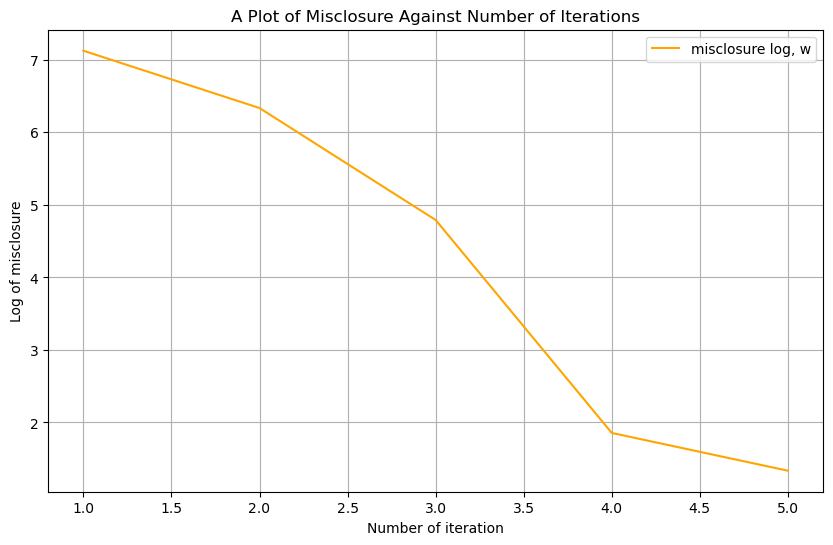

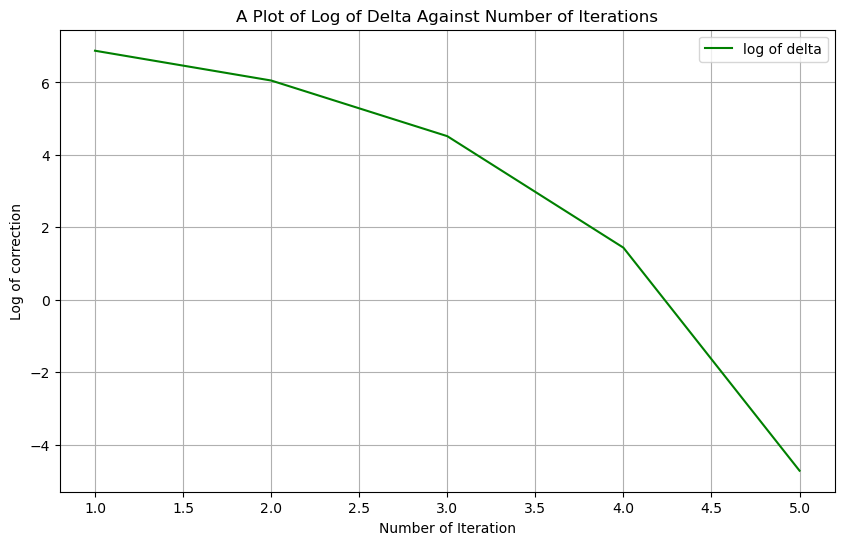

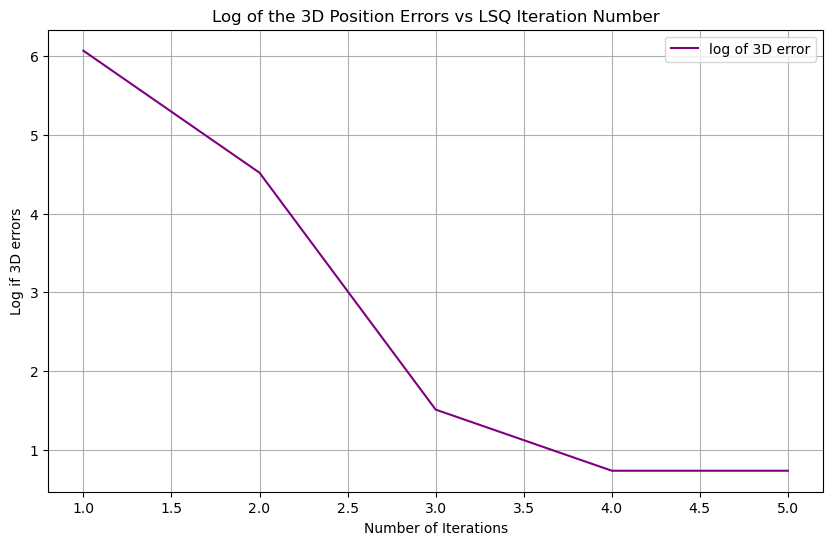

In [87]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)

# Compute log of misclosure matrix, w
misclosure_log = np.log10([np.linalg.norm(w) for w in arr_w])

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(arr_i, misclosure_log, label='misclosure log, w',color="orange")
plt.xlabel('Number of iteration')
plt.ylabel('Log of misclosure')
plt.title('A Plot of Misclosure Against Number of Iterations')
plt.grid(True)
plt.legend()
plt.show()
print("\n")
print("\n")

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)

# Compute log of correction matrix, delta
delta_log = np.log10([np.linalg.norm(delta[:3]) for delta in arr_delta])

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(arr_i, delta_log, label='log of delta',color="green")
plt.xlabel('Number of Iteration')
plt.ylabel('Log of correction')
plt.title('A Plot of Log of Delta Against Number of Iterations')
plt.grid(True)
plt.legend()
plt.show()
print("\n")
print("\n")

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

# Compute log of 3D errors
log_3D = np.log10(arr_err_pos)

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(arr_i, log_3D, label='log of 3D error', color="purple")
plt.xlabel('Number of Iterations')
plt.ylabel('Log of 3D errors')
plt.title('Log of the 3D Position Errors vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [88]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

# PLOT OF LOG OF MISCLOSURE AGAINST ITERATION NUMBER
# The observed phenomena in the plot of log of msiclosure against iteration number is Logarithmic Decline. From the plot, it was observed that with each iteration, the log of misclosure decreases. This shows that as number of iteration was increasing, and the parameter corrections were being added to the estimate, a more refined estimate of the parameter was being generated. The more the corrections was added, the lesser the misclosure between true and estimated parameters. Between iterations 4 and 5, it was observed that the line plot started flattening out. This indicates a point of convergence, which shows that more iteration will yield little or no significant corrections.

# PLOT OF LOG OF CORRECTIONS (DELTA) AGAINST ITERATION NUMBER
# The observed phenomena is Logarithmic decay. From the plot, it was observed that as the number of iterations increases, the amount of corrections added to the estimated parameter decreases. At first, a high number of correction was added to the parameters, then with each iteration comes a more optimized estimate that requires lesser amount of corrections to be added in order to further refine the values, hence the logarithmic pattern of the plot.

# PLOT OF LOG OF 3D POSITION ERRORS AGAINST ITERATION NUMBER
# Just like the two plots above, the observed phenomena in this plot is logarithmic decay pattern. The 3D error computed decreases with increase in the number of iterations. This shows that with each iteration comes a more refined receiver positional estimate, and the difference between the norm of this estimates and that of the receiver's true value decreases as well. From iteration number 4 to 5, it was was observed that the plot started flattening out. This flattening out the 3D position error line plot at this point shows convergence, which means that further optimization is not required as it will yield little or nothing from that point.


In [89]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
